Using TensorFlow backend.


10952704/11490434 [===========================>..] - ETA: 0s(50000, 28, 28) (50000,)


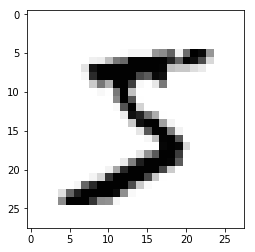

In [2]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0], cmap="Greys");

In [3]:

from __future__ import print_function

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [5]:
import tensorflow as tf




Goals:

    Code a deep (with at least 1 hidden layer) neural network in tensorflow
    Fit it on the train dataset, estimate quality on the test dataset
    Plot the train loss and test loss as a function of the training iteration number

Long description

In [6]:
import numpy as np
print(X_train.shape, X_val.shape)
print(y_train.shape, y_val.shape)

(50000, 28, 28) (10000, 28, 28)
(50000,) (10000,)


In [7]:
X_train = X_train.reshape(50000, 784)
X_val = X_val.reshape(10000, 784)
y_train = np.eye(10)[y_train]
y_val = np.eye(10)[y_val]

In [8]:
num_input = 784 
n_hidden_1 = 200 
n_hidden_2 = 300

num_classes = 10 

X = tf.placeholder(dtype = tf.float32, shape=[None, num_input])
Y = tf.placeholder(dtype = tf.float32, shape=[None, num_classes])

weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [9]:
    #NEURAL NET
layer_1 = tf.nn.tanh(tf.add(tf.matmul(X, weights['h1']), biases['b1']))
    
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))

out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    

In [16]:
    #PREDICTION
prediction = tf.nn.softmax(out_layer)
    #COST
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=prediction))
    #OPTIMIZER
starter_learning_rate = 0.003
global_step = tf.Variable(0, trainable=False)
learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 100, 0.965, staircase=True)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    #VARIABLES
train_costs = []
val_costs = []
hm_epochs = 100
batch_size = 128
epoch = 0 
    #INITIALIZER
init = tf.global_variables_initializer()


   


Test cost of 1 epochs: 1.67273
Test cost of 2 epochs: 1.63728
Test cost of 3 epochs: 1.62193
Test cost of 4 epochs: 1.6123
Test cost of 5 epochs: 1.60768
Test cost of 6 epochs: 1.6032
Test cost of 7 epochs: 1.60095
Test cost of 8 epochs: 1.59531
Test cost of 9 epochs: 1.59227
Test cost of 10 epochs: 1.58852
Test cost of 11 epochs: 1.5888
Test cost of 12 epochs: 1.58565
Test cost of 13 epochs: 1.58275
Test cost of 14 epochs: 1.58046
Test cost of 15 epochs: 1.57968
Test cost of 16 epochs: 1.57886
Test cost of 17 epochs: 1.57674
Test cost of 18 epochs: 1.57677
Test cost of 19 epochs: 1.57624
Test cost of 20 epochs: 1.5747
Test cost of 21 epochs: 1.57684
Test cost of 22 epochs: 1.57474
Test cost of 23 epochs: 1.57281
Test cost of 24 epochs: 1.57238
Test cost of 25 epochs: 1.5725
Test cost of 26 epochs: 1.57129
Test cost of 27 epochs: 1.57074
Test cost of 28 epochs: 1.57045
Test cost of 29 epochs: 1.56932
Test cost of 30 epochs: 1.56961
Test cost of 31 epochs: 1.5683
Test cost of 32 epochs:

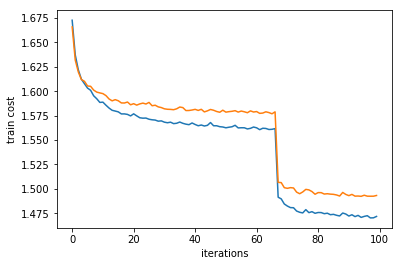

ValueError: Cannot feed value of shape (10000, 28, 28) for Tensor 'Placeholder:0', which has shape '(?, 784)'

In [17]:
 #SESSION
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(100):
        for i in range(0, 50000, batch_size):
            sess.run(optimizer, feed_dict={X:X_train[i:i+batch_size], Y:y_train[i: i+batch_size]})
        train_costs.append(sess.run(cost, feed_dict={X:X_train, Y:y_train}))
        val_costs.append(sess.run(cost, feed_dict={X:X_val, Y:y_val}))
        print("Test cost of " + str(epoch+1)+ " epochs: "+ str(train_costs[-1]))

    iterations = list(range(100))
    plt.plot(iterations, train_costs, label='Train')
    plt.plot(iterations, val_costs, label='Test')
    plt.ylabel('train cost')
    plt.xlabel('iterations')
    plt.show()        
    
    
    correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))

    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    train_accuracy = accuracy.eval({X: X_train, Y: y_train})
    test_accuracy = accuracy.eval({X: X_test, Y: y_test})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

    
    